# CUSTOMER ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Import Data

In [119]:
url = 'https://raw.githubusercontent.com/kokocamp/vlog101/master/vlog101.csv'
data = pd.read_csv(url)
data.head()

,CustomerID,Sex,Usia,Gaji (juta),Skor Belanja (1-100)
0,1,Pria,19,15,39
1,2,Pria,21,15,81
2,3,Wanita,20,16,6
3,4,Wanita,23,16,77
4,5,Wanita,31,17,40


### 2. Exploratory Data Analysis (EDA) and Customer Analysis

In [110]:
data.describe()

,CustomerID,Usia,Gaji (juta),Skor Belanja (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            200 non-null    int64 
 1   Sex                   200 non-null    object
 2   Usia                  200 non-null    int64 
 3   Gaji (juta)           200 non-null    int64 
 4   Skor Belanja (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0.5, 1.0, 'Distribusi Sex')

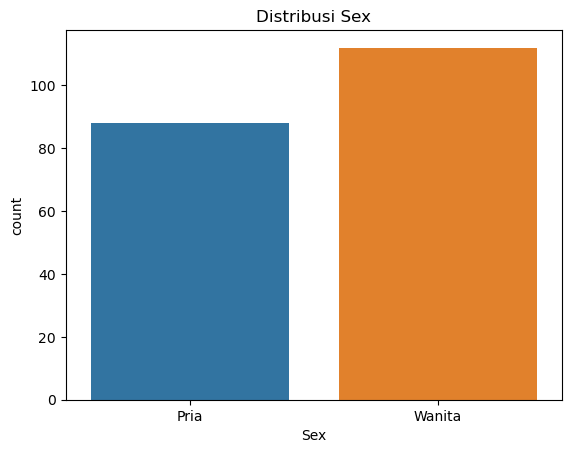

In [112]:
sns.countplot(x='Sex', data=data)
plt.title('Distribusi Sex')

Berdasarkan grafik Distribusi Sex dapat diketahui bahwa pelanggan wanita jumlahnya lebih banyak dari pada jumlah pelangga pria dan data yang dianalsis tidak memiliki indikasi adanya imbalance data.

Text(0.5, 0, 'Usia')

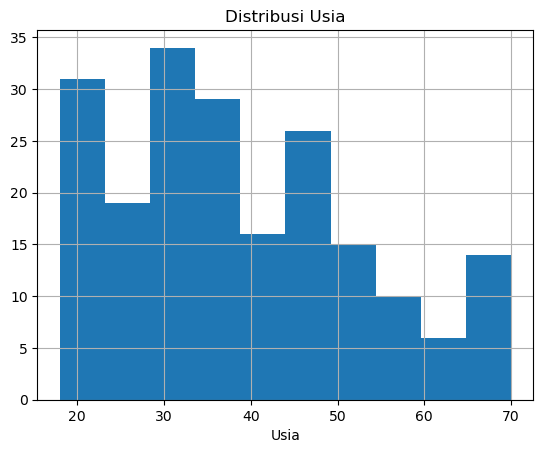

In [157]:
data.hist('Usia')
plt.title('Distribusi Usia')
plt.xlabel('Usia')

Berdasarkan grafik Distribusi Usia dapat diketahui bahwa usia terbanyak berada pada pada rentang usia 20-an akhir hingga 30-an awal.

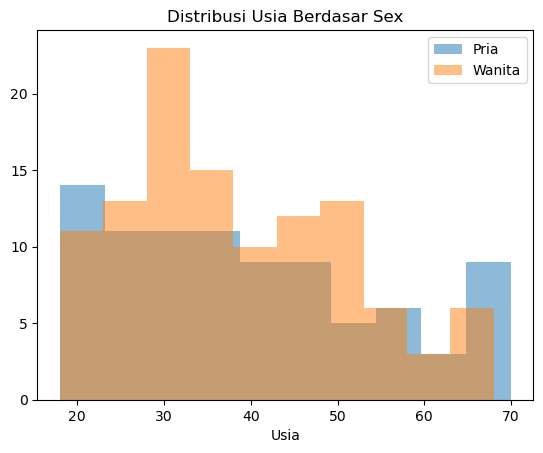

In [114]:
plt.hist(x='Usia', data=data[data['Sex'] == 'Pria'], alpha=0.5, label='Pria')
plt.hist(x='Usia', data=data[data['Sex'] == 'Wanita'], alpha=0.5, label='Wanita')
plt.title('Distribusi Usia Berdasar Sex')
plt.xlabel('Usia')
plt.legend()

Berdasarkan grafik distribusi berdasarkan jenis kelamin dapat diketahui bahwa:
- pria muda lebih banyak dari pada wanitadi rentang usia 20 an.

- wanita lebih banyak dari padad pria di rentang usia paruh baya 30 an.

- ada kelompok pria tua di range usia 65 sampai 70 yang lebih banyak dari pada wanita.

Text(0.5, 0, 'Juta')

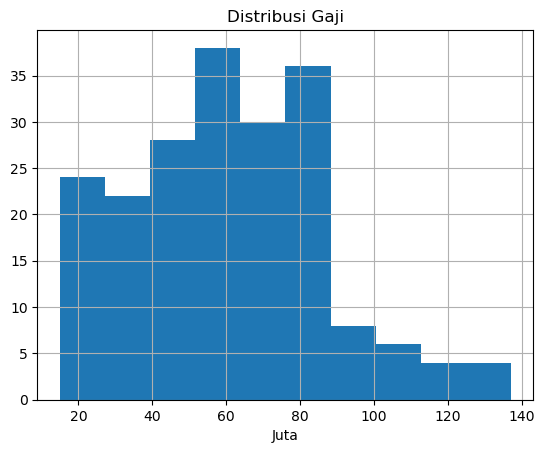

In [115]:
data.hist('Gaji (juta)')
plt.title('Distribusi Gaji')
plt.xlabel('Juta')

Berdasarkan grafik Distribusi Gaji dapat diketahui bahwa rentang gaji yang banyak ada di angka 60-80 juta.

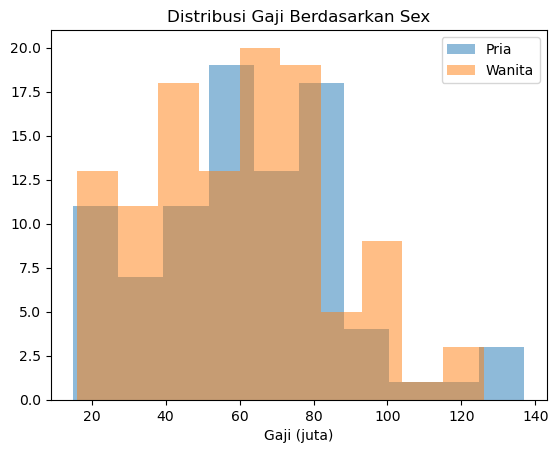

In [158]:
plt.hist(x='Gaji (juta)', data=data[data['Sex']=='Pria'], alpha=0.5, label='Pria')
plt.hist(x='Gaji (juta)', data=data[data['Sex']=='Wanita'], alpha=0.5, label='Wanita')
plt.xlabel('Gaji (juta)')
plt.title('Distribusi Gaji Berdasarkan Sex')
plt.legend()

Berdasarkan grafik Distribusi Gaji Berdasarkan Sex dapat diketahui bahwa wanita bergaji lebiih sedikit dibanding pria  karena pada rentang 130-140 juta lebih banyak pria.

In [159]:
pria = data[data['Sex']=='Pria']
wanita = data[data['Sex']=='Wanita']

print(pria['Skor Belanja (1-100)'].mean())
print(wanita['Skor Belanja (1-100)'].mean())

48.51136363636363
51.526785714285715


Berdasarkan nilai rata-rata Skor Belanja (1-100) wanita memiliki skor yang lebih tinggi dari pria. Sehingga dapat disimpulkan meskipun wanita bergaji lebih sedikit tetapi memiliki skor belanja lebih tinggi.

Text(0.5, 1.0, 'Usia dan Gaji Berdasar Sex')

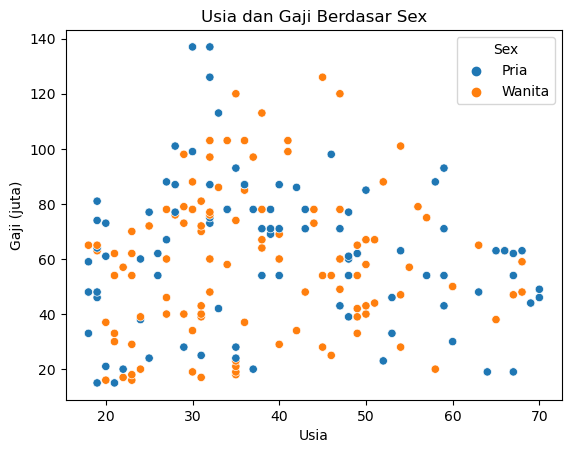

In [160]:
sns.scatterplot(x='Usia', y='Gaji (juta)', hue='Sex', data=data)
plt.title('Usia dan Gaji Berdasar Sex')

Berdarkan scatterplot Usia dan Gaji Berdasar Sex persebaran data kurang bisa dilihat jelas, sehingga akan dilihat melalui heatmap.

In [121]:
drop_column = ['CustomerID', 'Sex']
data2 = data.drop(drop_column, axis=1)
data2.head()

,Usia,Gaji (juta),Skor Belanja (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<Axes: >

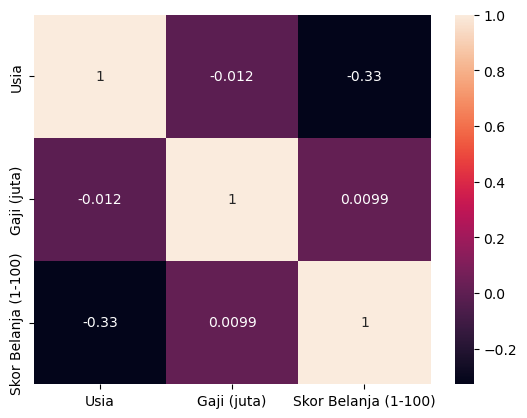

In [122]:
sns.heatmap(data2.corr(), annot=True)

Berdasarkan heatmap di atas dapat diketahui bahwa variabel yang memiliki korelasi yang cukup kuat adalah variabel Usia dan Skor Belanja dengan nilai korelasi sebesar -0.33 yang berarti memiliki korelasi negatif. Sehingga dapat disimpulkan bahwa semakin tua pelanggan semakin rendah skor belanjanya, namun korelasi tersebut cukup kuat jadi tidak banyak informasi yang dapat diperoleh, begitupun dengan koerlasi lainnya yang memiliki nilai korelasi yang sangat lemah.

Text(0.5, 1.0, 'Usia dan Skor Belanja Berdasar Sex')

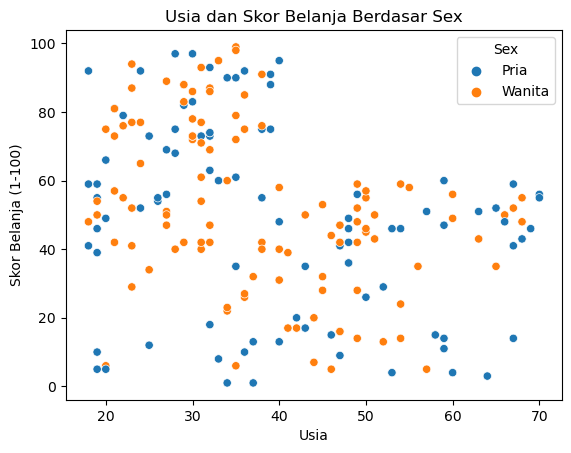

In [161]:
sns.scatterplot(x='Usia', y='Skor Belanja (1-100)', hue='Sex', data=data)
plt.title('Usia dan Skor Belanja Berdasar Sex')

Berdasarkan grafik Usia dan Skor Belanja Berdasar Sex jika diperhatikan pada rentang usia tua, skor belanjanya semakin renda dibandingkan rentang usia muda. Hal ini sesuai dengan heatmap korelasi sebelumnya.

In [162]:
data_encoded = pd.get_dummies(data, columns=['Sex'])

In [163]:
data_encoded

,CustomerID,Usia,Gaji (juta),Skor Belanja (1-100),Sex_Pria,Sex_Wanita
0,1,19,15,39,True,False
1,2,21,15,81,True,False
2,3,20,16,6,False,True
3,4,23,16,77,False,True
4,5,31,17,40,False,True
...,...,...,...,...,...,...
195,196,35,120,79,False,True
196,197,45,126,28,False,True
197,198,32,126,74,True,False
198,199,32,137,18,True,False


In [166]:
data_wanita = data_encoded[data_encoded['Sex_Wanita']==1]

Text(0.5, 1.0, 'Korelasi Heatmap - Wanita')

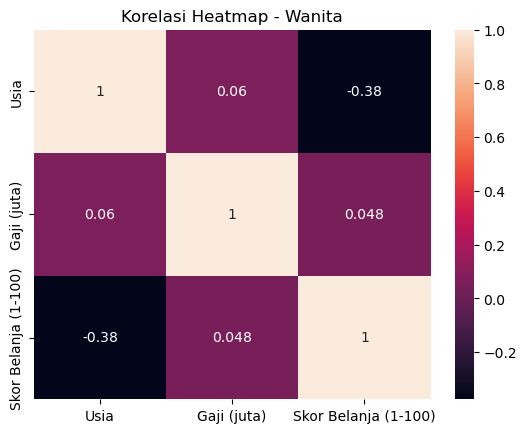

In [167]:
sns.heatmap(data_wanita[['Usia','Gaji (juta)','Skor Belanja (1-100)']].corr(), annot=True)
plt.title('Korelasi Heatmap - Wanita')

In [168]:
data_pria = data_encoded[data_encoded['Sex_Wanita']==0]

Text(0.5, 1.0, 'Korelasi Heatmap - Pria')

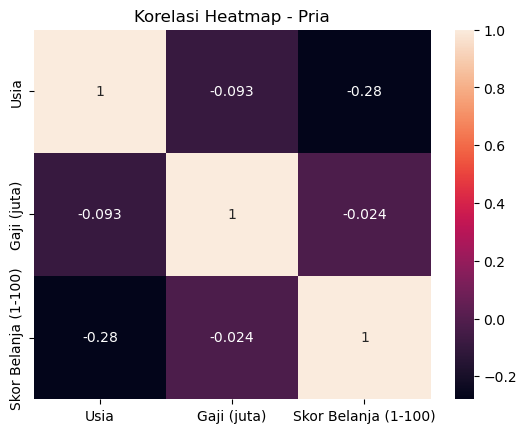

In [169]:
sns.heatmap(data_pria[['Usia','Gaji (juta)','Skor Belanja (1-100)']].corr(), annot=True)
plt.title('Korelasi Heatmap - Pria')

Berdasarkan dari kedua grafik di atas Korelasi Heatmap - Wanita dan Korelasi Heatmap - Pria, usia lebih berpengaruh terhadap jenis kelamin perempuan karena korelasi antara usia dan skor belanja pada wanita lebih besar dari pada pria.

C:\Users\Semanggi University\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Usia dan Skor Belanja Khusus Wanita')

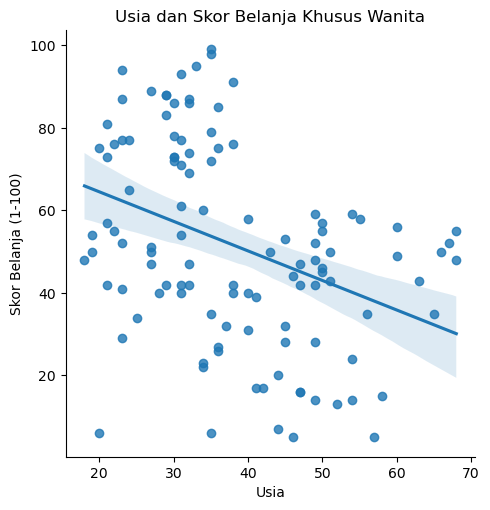

In [170]:
sns.lmplot(x='Usia', y='Skor Belanja (1-100)', data=data[data['Sex'] == 'Wanita'])
plt.title('Usia dan Skor Belanja Khusus Wanita')

Berdasarkan scatterplot di atas dapat diketahui bahwa terdadat garis menurun yang artinya terdapat korelasi negatif. Hal ini sesuai dengan heatmap sebelumya yang menampilkan nilai korelasi sebesar -0.38. Sehingga terbukti bahwa usia wanita yang lebih tua memiliki skor belanja lebih rendah daripada usia muda.

Text(0.5, 1.0, 'Gaji dan Skor Belanja Berdasar Sex')

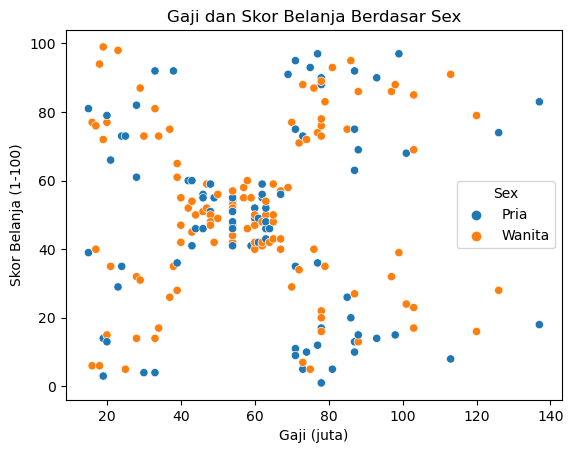

In [171]:
sns.scatterplot(x='Gaji (juta)', y='Skor Belanja (1-100)', hue='Sex', data=data)
plt.title('Gaji dan Skor Belanja Berdasar Sex')

Berdasarkan scatterplot Gaji dan Skor Belanja Berdasar Sex terdapat 5 pola.
1. Gaji rendah - Skor belanja rendah
2. Gaji rendah - Skor belanja tinggi
3. Gaji menengah - Skor belanja sedang
4. Gaji tinggi - Skor belanja rendah
5. Gaji tinggi - Skor belanja tinggi

##### Pada analisis yang telah dilakukan sebenarnya dapat dilakukan analisis lebih lanjut menggunakan metode lainnnya. Sehingga bisa didapatkan kesimpulan yang lebih baik. Namun, pada analisis ini hanya digunakan analisis sederhana untuk analisis pelanggan. Terima kasih.

#### source: https://www.youtube.com/watch?v=VoUESquk9FI